# **BANK TERM DEPOSIT CHURN**





# **Introduction**


This project aims to predict customer starting a new bank term deposit using machine learning techniques - Tree Classifier and RF. By analyzing historical data on customer demographics (Age, Education level, Occupation, Marital status, loan, length of coversation, month of contact etc ) I developed a model to identify customers who are likely to start a new term deposits.

The goal is to enable the bank to take proactive measures, such as targeted marketing strategies, to increase customer base.





# **Highlights**


#A. Data overview

#B. EDA - data imbalance, feature distribution, chi-square test for correlation ( boxplots, correlation plots, distribution plots)

#C. Feature engineering

#D. Model selection

#E. Hyperparameter tuning

#F. Discussions



#A. Data overview

In [ ]:
# import frameworks and get an overveiw of the data  (head, shape, info , describe etc.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scipy
import numpy as np
import scipy.stats as stats


data = pd.read_csv("/content/drive/MyDrive/bank.csv")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.shape

(11162, 17)

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# print the unique values in each column
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']



# B. EDA


1.Find Missing Values

2.Find Features with one value

3.Explore the Categorical Features

4.Find CategoricalFeature Distribution

5.Chisquare test to check relationship between variables

6.Relationship between Categorical Features and Label

7.Distribution of Continous Numerical Features

8.Relation between Continous numerical Features and Labels

9.Find Outliers in numerical features

10.Find Pair Plot/scatter plot to understand correlation between independent variables

12.Check the Data set is balanced



# EDA1. find missing values


In [ ]:
# check if sum of isnull for each column, that is (  data[features] ) is greater than zero or not
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]

for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


# EDA2. Find number of unique values in each columns


In [ ]:
# nunique returns the number of unique elements in the object

for column in data.columns:
    print(column,data[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


There is no column with only one unique value

In [ ]:
# print unique values in 'pdays' columns
data['pdays'].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

# EDA3. Print categorical features and find the features distribution

In [ ]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
categorical_df = data.select_dtypes(include=['object', 'category'])
print(categorical_df.head())

# find how many data points are there for categorical variable = married and deposit = no
mar_yes = len(categorical_df[(categorical_df['marital'] == 'married') & (categorical_df['deposit'] == 'yes')] )
mar_no=len(categorical_df[(categorical_df['marital'] == 'married') & (categorical_df['deposit'] == 'no')] )
unmar_yes= len(categorical_df[(categorical_df['marital'] == 'unmarried') & (categorical_df['deposit'] == 'yes')] )
unmar_no = len(categorical_df[(categorical_df['marital'] == 'unmarried') & (categorical_df['deposit'] == 'no')] )


#


          job  marital  education default housing loan  contact month  \
0      admin.  married  secondary      no     yes   no  unknown   may   
1      admin.  married  secondary      no      no   no  unknown   may   
2  technician  married  secondary      no     yes   no  unknown   may   
3    services  married  secondary      no     yes   no  unknown   may   
4      admin.  married   tertiary      no      no   no  unknown   may   

  poutcome deposit  
0  unknown     yes  
1  unknown     yes  
2  unknown     yes  
3  unknown     yes  
4  unknown     yes  


In [ ]:

for feature in categorical_features:
    print('The feature {} and number of categories are {}'.format(feature,len(data[feature].unique())))




The feature job and number of categories are 12
The feature marital and number of categories are 3
The feature education and number of categories are 4
The feature default and number of categories are 2
The feature housing and number of categories are 2
The feature loan and number of categories are 2
The feature contact and number of categories are 3
The feature month and number of categories are 12
The feature poutcome and number of categories are 4


# EDA4 check count based on categorical features

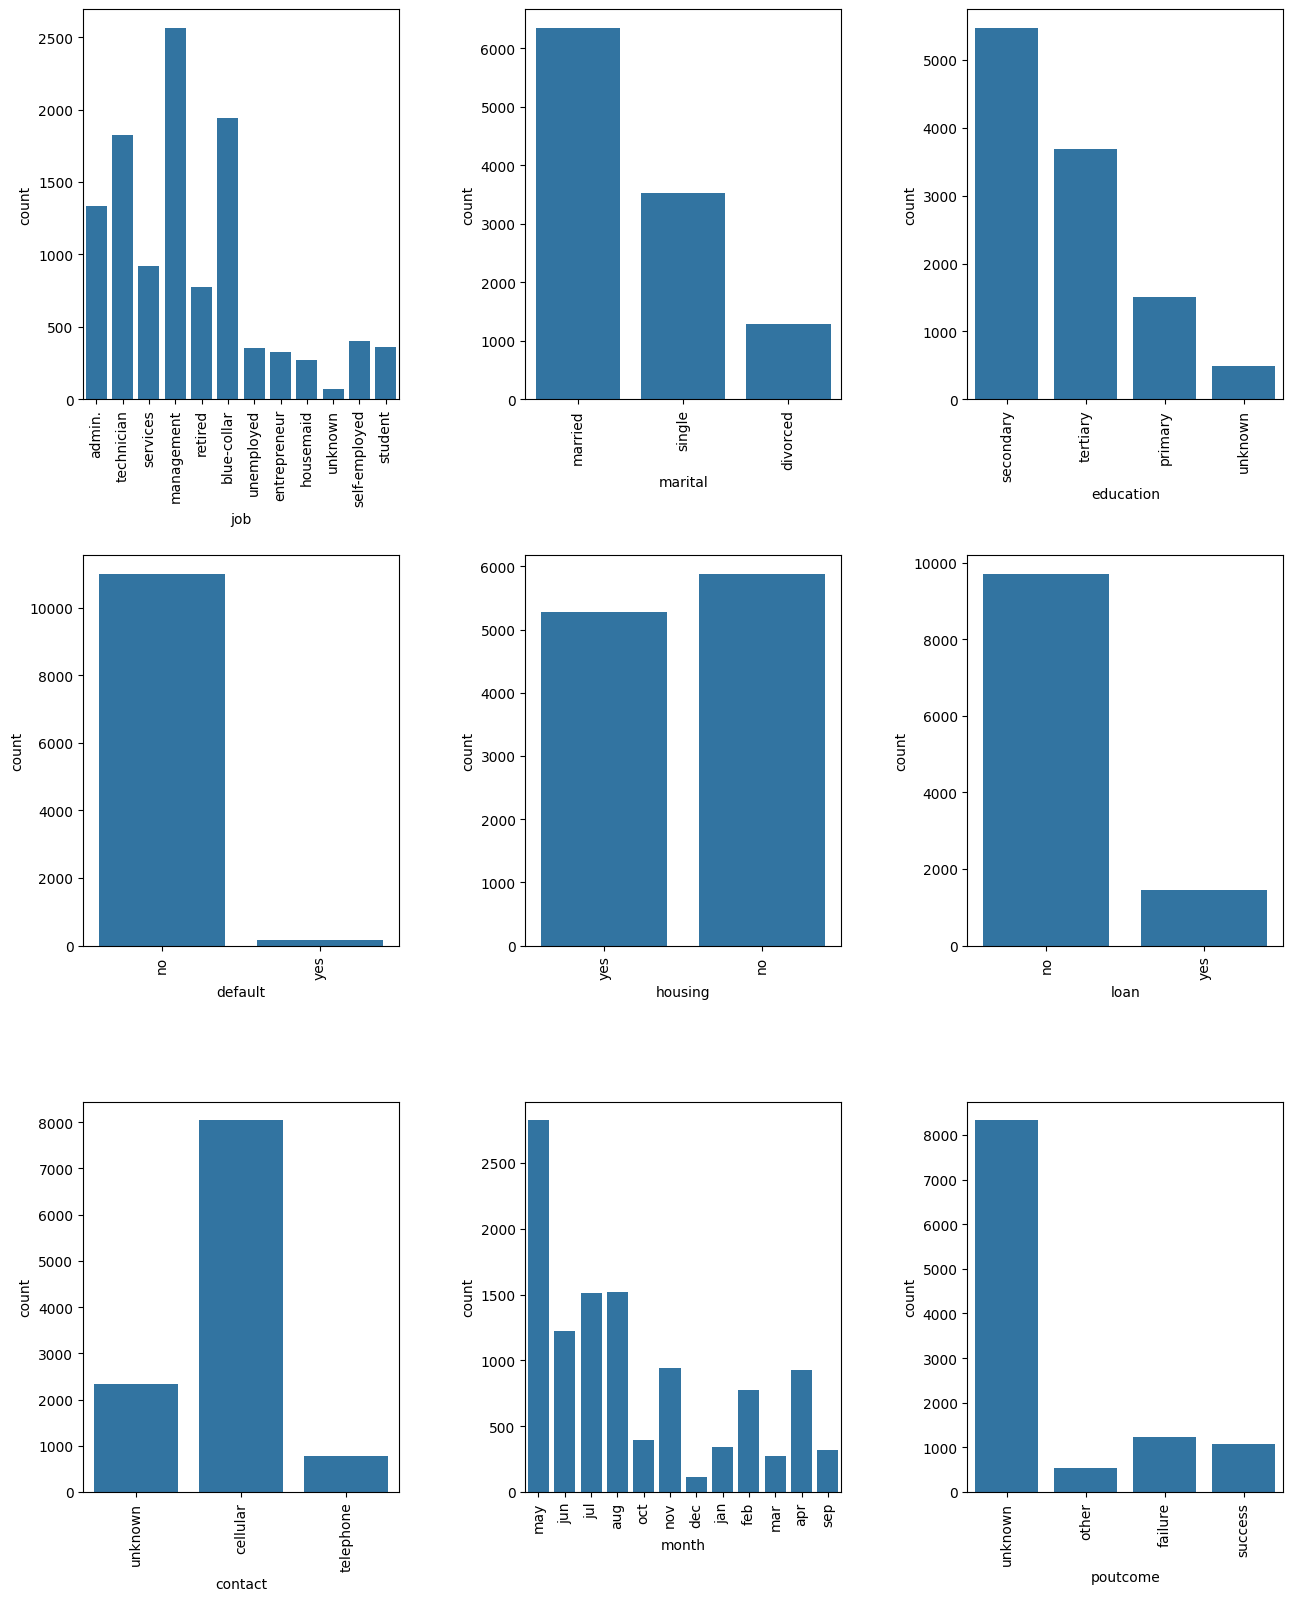

In [ ]:
plt.figure(figsize=(15,80), facecolor='white')

plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    sns.countplot(x=categorical_feature,data=data)
    labels=categorical_feature
    x=list(range(1,len(categorical_feature)))
    plt.xlabel(categorical_feature)
    plt.xticks(rotation = 90)
    plotnumber+=1

plt.show()

Job type predominantly is management, blue-collar, technician and admin.

Married is more than unmarried

No defaults is much higher than default yes.

Most data falls into month of May, followed by July,August, June, november and april. Likely that campaigns were active during then. Maybe customers are more interested in deposit during that interval, which resulted in active calls.
One important observation is number of married is far higher ~6000 compared to rest. Hence for future study, we may develop separate models for marital status single vs married vs divorced or married vs not-married.

# EDA 5 . Chi square tests

In [ ]:


# d1.head()
# # Perform the Chi-Square test
# chi2_stat, p_val, dof, expected = chi2_contingency(d1)
# # Output results
# print(f"Chi-Square Statistic: {chi2_stat}")
# print(f"P-value: {p_val}")
# print(f"Degrees of Freedom: {dof}")
# print(f"Expected Frequencies: \n{expected}")

from scipy.stats import chi2_contingency
for feature1 in categorical_features:
  print(feature1)


  for feature2 in categorical_features:
     d1 = pd.crosstab(index=data[feature1], columns=data[feature2] )
     chi2_stat, p_val, dof, expected = chi2_contingency(d1)
    #  print(f"Chi-Square Statistic: {chi2_stat}")
     if p_val > .05:
      print(f"P-value: {p_val, feature1, feature2}")
    #  print(f"Degrees of Freedom: {dof}")
    #  print(f"Expected Frequencies: \n{expected}")


job
marital
P-value: (0.11493696693104051, 'marital', 'default')
education
P-value: (0.36093115105164864, 'education', 'default')
default
P-value: (0.11493696693104055, 'default', 'marital')
P-value: (0.36093115105164864, 'default', 'education')
P-value: (0.2746986205100015, 'default', 'housing')
housing
P-value: (0.2746986205100015, 'housing', 'default')
loan
P-value: (0.05702749561913051, 'loan', 'contact')
contact
P-value: (0.05702749561913051, 'contact', 'loan')
month
poutcome


# Observations from chi square test

Chi square test shows that there is no significant correlation between the features.

In a chi-square test, the null hypothesis H0 assumes that there is no association or independence between the variables. The alternative hypothesis Ha suggests that there is a significant relationship between the variables.

If p-value ≥ 0.05: We fail to reject the null hypothesis, meaning there is no statistically significant association between the variables.

#EDA 6 EXPLORATORY ANALYSIS ON WHICH (SUB)CATEGORY WAS MORE LIKELY TO INITIATE DEPOSIT

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

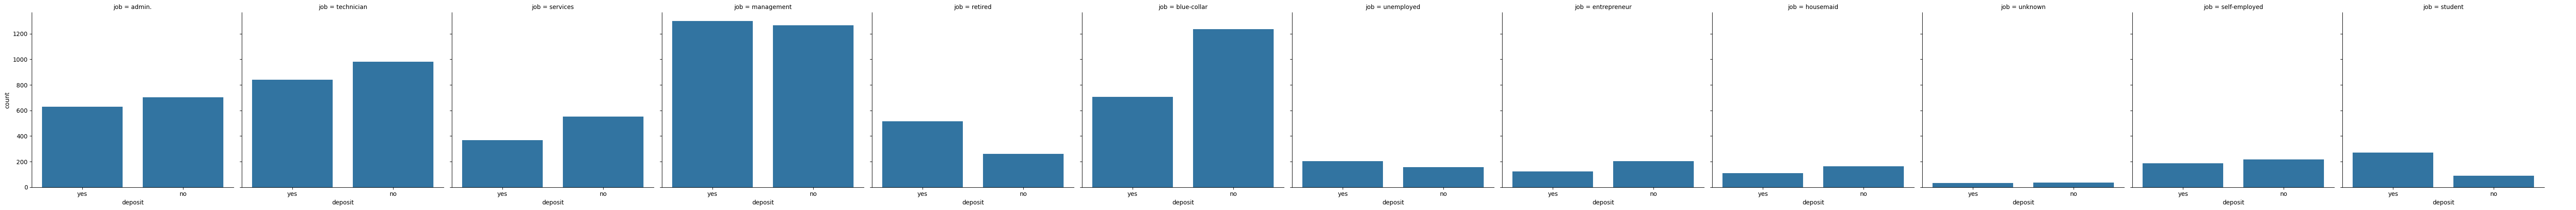

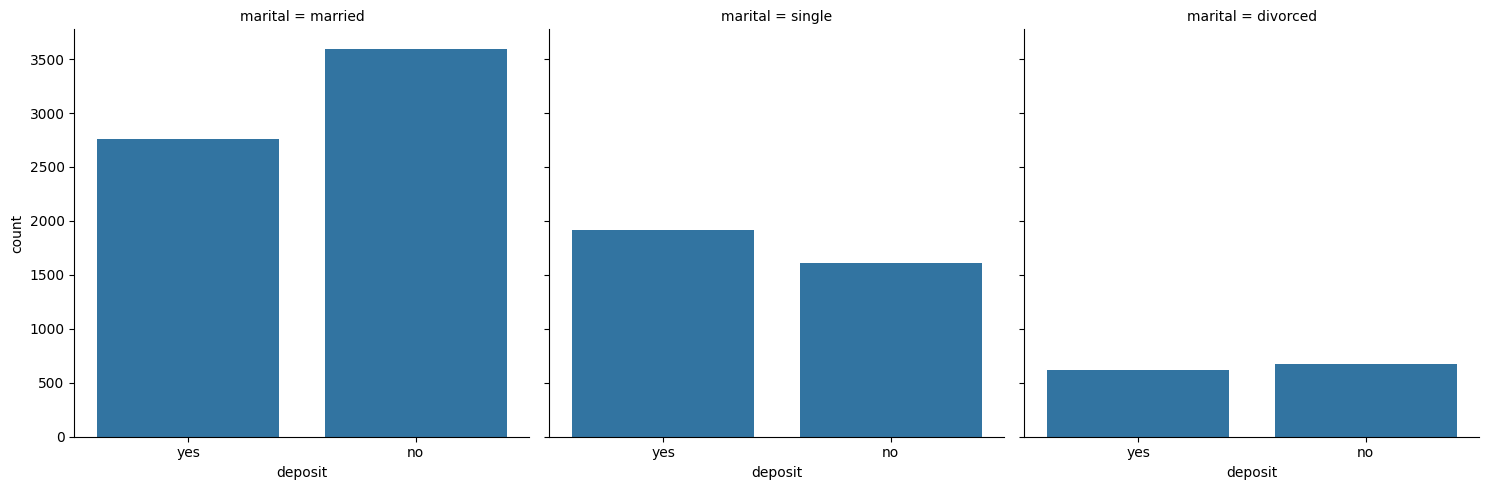

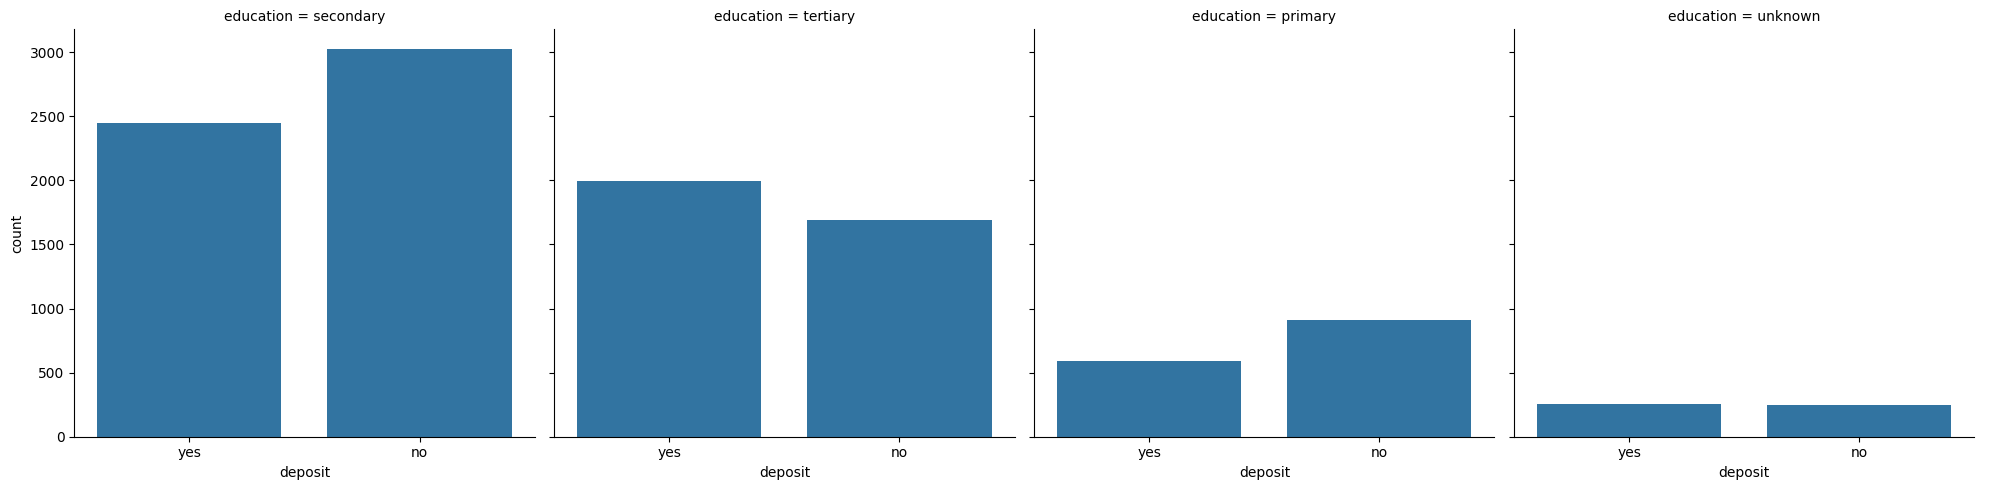

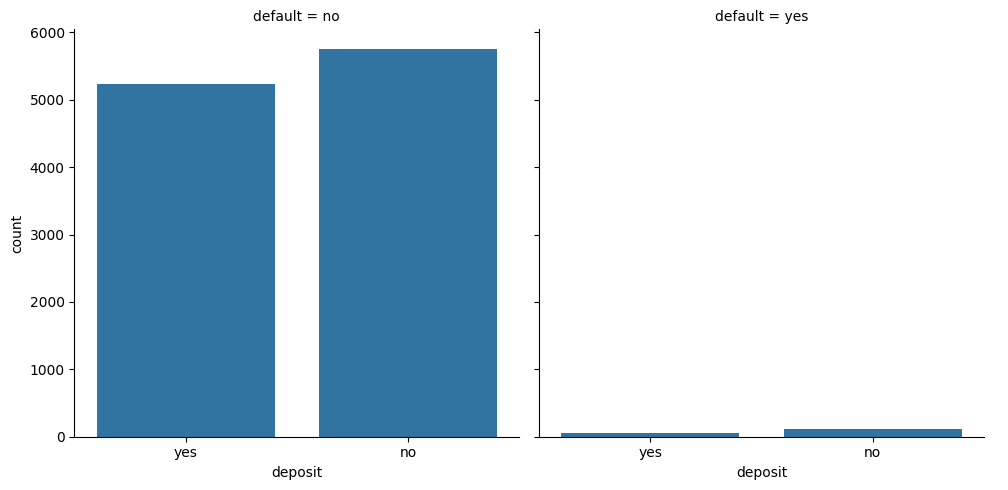

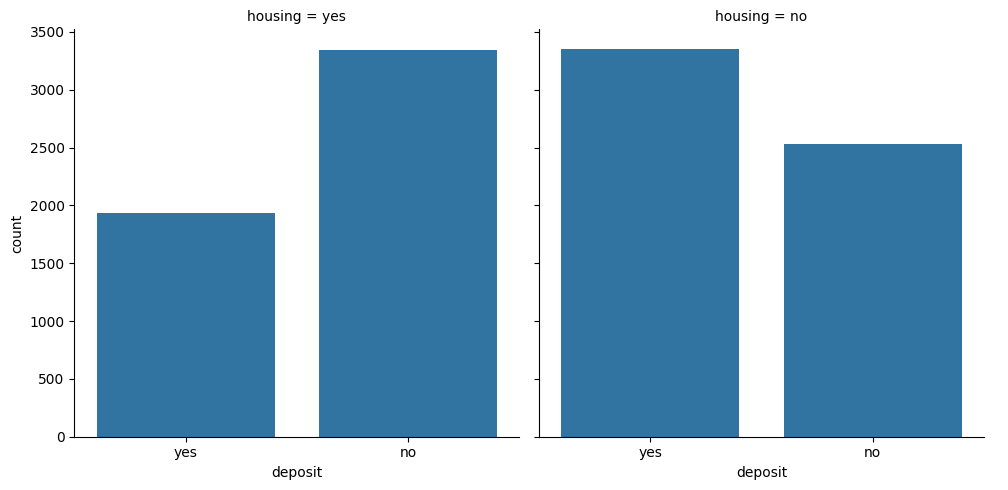

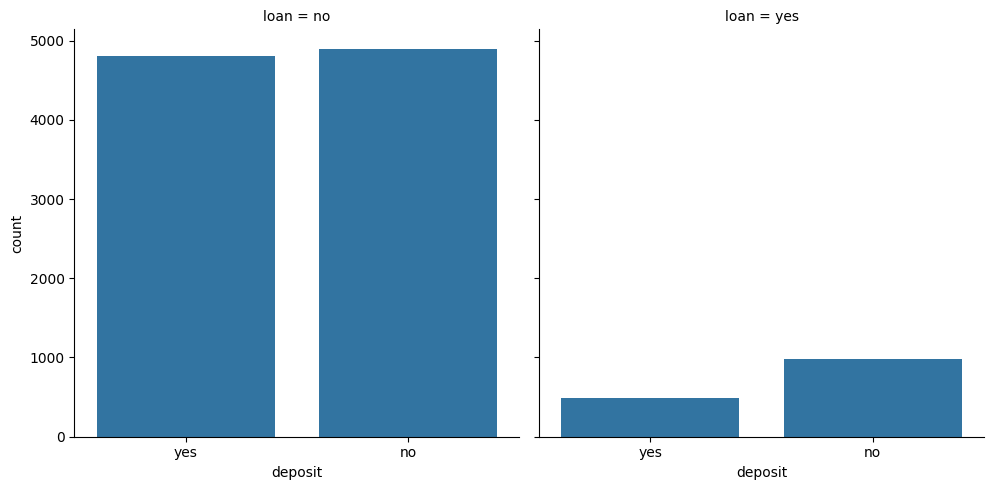

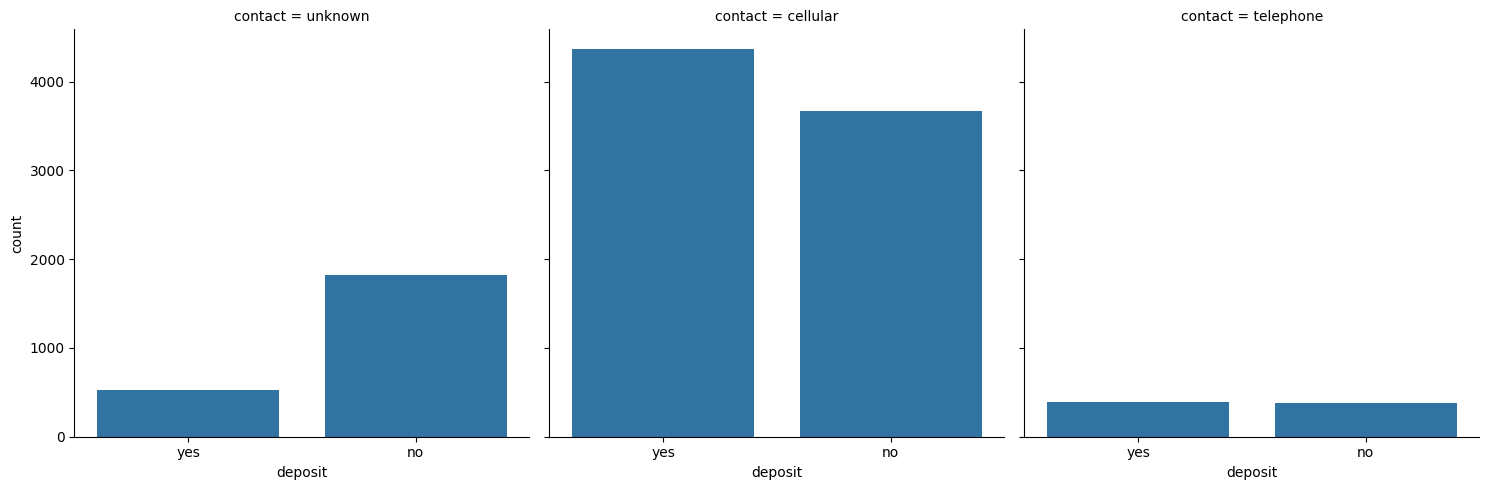

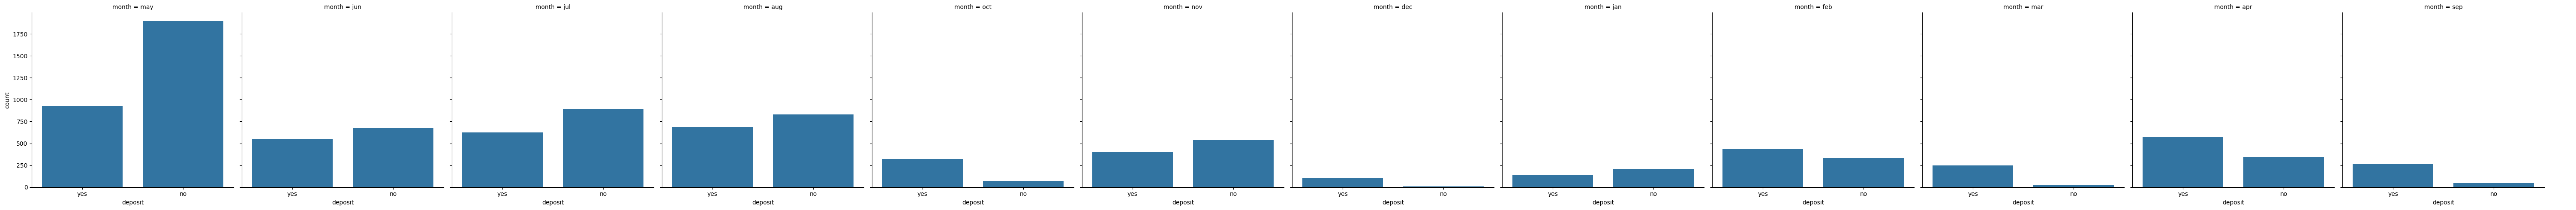

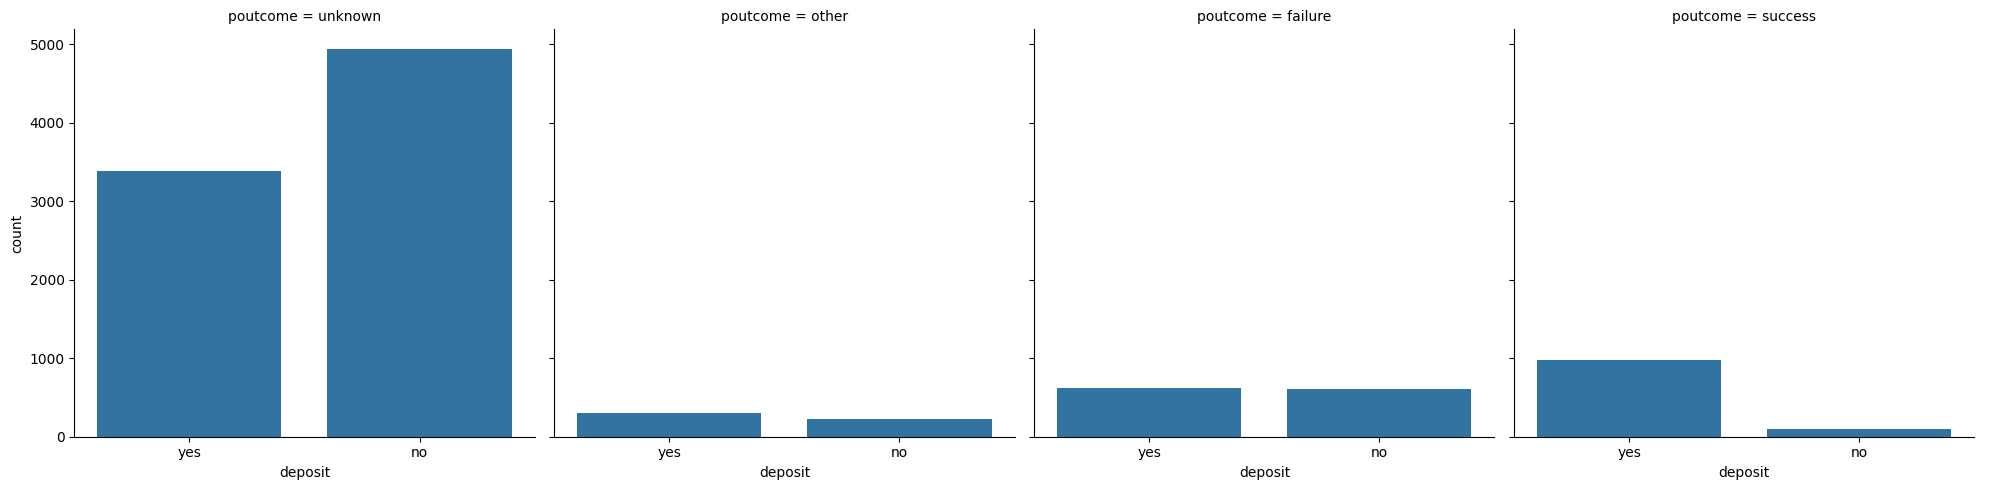

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= data)
plt.show()

#sns.catplot(x='deposit', col='marital', kind='count', data= data)

Married category is slightly biased towards NO

Job has 12 categories and only one category, blue-collar shows bias towards NO deposit

Secondary and primary education is biased towards NO

Contact=Telephone, no bias
Loan = NO, does not influence

Poutcome = Unknown, has a bias for NO.

In May, many clients were contacted, but ratio is almost 2 :1 ( no:yes)




# EDA 7 Numerical variables


In [ ]:
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()


Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


# EDA 8 Distribution of numerical variables

Discrete Variables Count: 0
Continuous feature Count 7


<ipython-input-16-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[continuous_feature])
<ipython-input-16-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[continuous_feature])
<ipython-input-16-467c3cd14366>:13: UserWarning: 

`distplot` is a deprecated fu

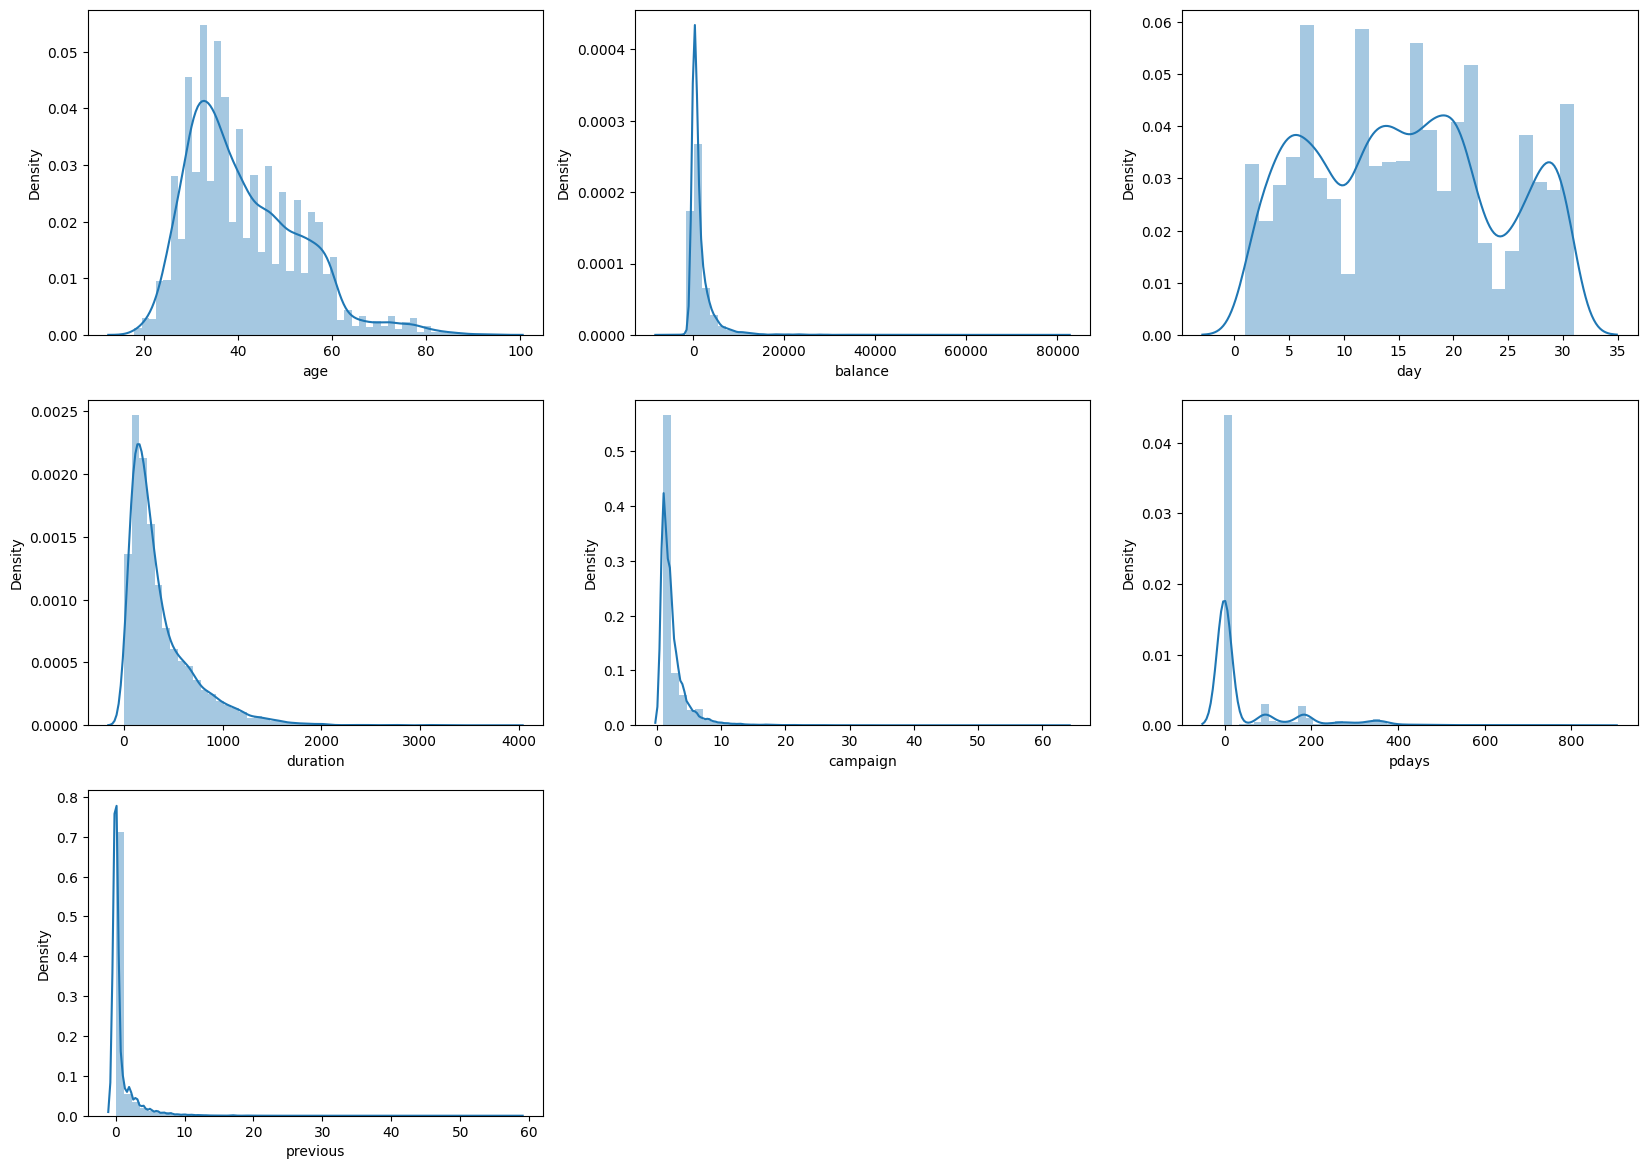

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

#EDA 9 correlation of continous variables

<Axes: >

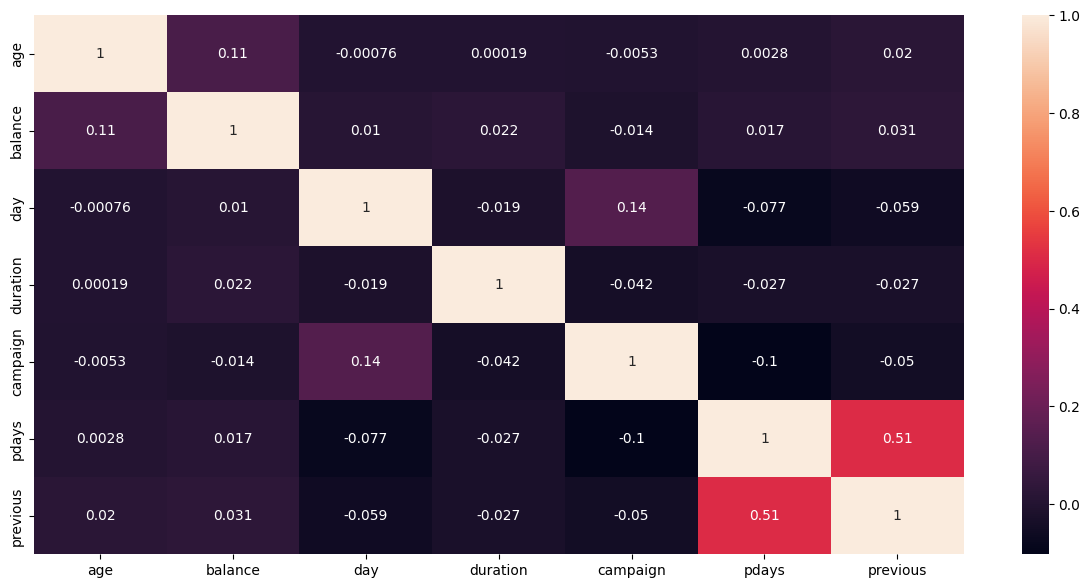

In [ ]:
## Checking for correlation
## data overveiw
cor_mat =  data[numerical_features].corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

# data.head()
# data1 = data#cor_mat=continuous_features.corr()
# fig = plt.figure(figsize=(15,7))
# sns.heatmap(cor_mat,annot=True)
# data1['age'].min()
# data1.head()

Outliers in age: 171
Outliers in balance: 1055
Outliers in day: 0
Outliers in duration: 636
Outliers in campaign: 601
Outliers in pdays: 2750
Outliers in previous: 1258

Outliers in age:
        age
1162    75
1236    85
1243    90
1274    85
1320    83
...    ...
10438   77
10562   88
10570   77
10618   78
10843   86

[171 rows x 1 columns]

Outliers in balance:
        balance
9         5090
60        7180
61        5291
69        4580
71       10576
...        ...
11073     6718
11077     6102
11085     4243
11086     6445
11101     6242

[1055 rows x 1 columns]

Outliers in duration:
        duration
0          1042
1          1467
2          1389
6          1201
9          1297
...         ...
10647      1504
10788      1090
10798      1152
10802      1244
11008      1812

[636 rows x 1 columns]

Outliers in campaign:
        campaign
125           8
135          11
163           9
186          10
187          15
...         ...
11057        10
11074        12
11086         8
1113

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

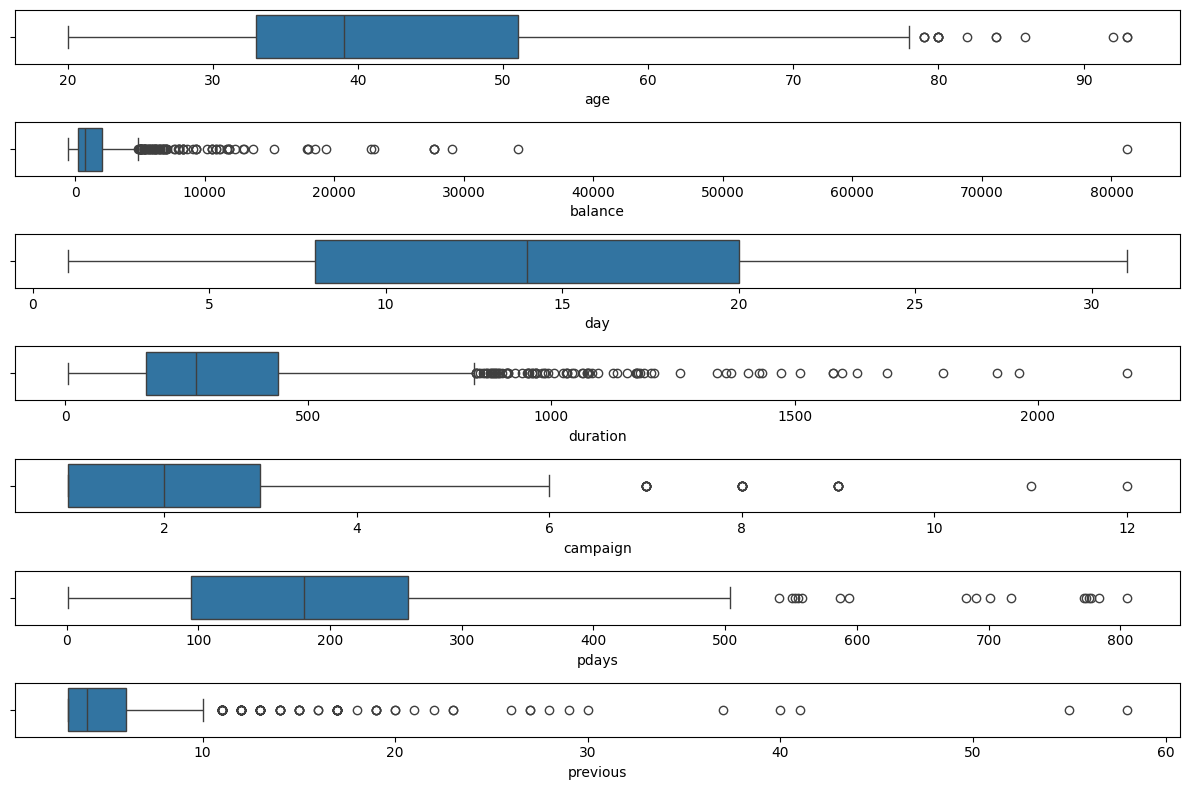

In [ ]:
#EDA 9.  plot the oultier in each of the numerical features column using boxplot
outliers = {}

for feature in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers in this feature
    outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Print outliers count for each feature
    print(f"Outliers in {feature}: {outliers[feature].shape[0]}")

# Step 5: Optional: Display the rows that are considered outliers
for feature, data in outliers.items():
    if not data.empty:
        print(f"\nOutliers in {feature}:\n", data[[feature]])



# Visualize the numerical features using boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(7,1, i)
    sns.boxplot(x=data[feature])
    #plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


# plot the oultier in each of the numerical features column using IQR



#C Feature engineering


In [ ]:

data1=data

#for deposit column, replace yes with 1 and no with 0
data1['deposit_numeric']=data1['deposit'].map({'yes':1,'no':0})

# use log(10000 + balance) as new column
data1['balance_log']=np.log(data1['balance']+10000)
data1['duration_log']=np.log(data1['duration'])
data1['age_log']=np.log(data1['age'])


# drop deposit column
data1.drop('deposit',axis=1,inplace=True)


# add column for month_may =1 and rest of months = 0
data1['month_impact']=data1['month'].apply(lambda x : [1,2,3] if x == ['mar','sep','oct'] else 0)
data1['age_cat']=data1['age'].apply(lambda x : 1 if x < 60 else 0 )
data1['balance_cat']=data1['balance'].apply(lambda x : 1 if x < 20000 else 0 )
data1['duration_cat']=data1['duration'].apply(lambda x : 1 if x < 2000 else 0 )
data1['campaign_cat']=data1['balance'].apply(lambda x : 1 if x < 20000 else 0 )

# drop columns job, marital, education
#data1.drop(['education','month'],axis=1,inplace=True)


# one hot encoding for categorical - contact, poutcome, default etc.
data2 = pd.get_dummies(data1, columns=['contact','job','poutcome','default','housing','loan','marital','education','month'])
data2['loan_attraction'] = data2['loan_yes'] + data2['default_yes']+data2['loan_no'] + data2['default_no']
#data2['housing_attraction'] = data2['housing_yes'] + data2['default_yes


# drop outliers from balance_log,age and duration
data2 = data2[np.abs(data2['balance_log']-data2['balance_log'].mean())<=(4*data2['balance_log'].std())]
data2 = data2[np.abs(data2['duration']-data2['duration'].mean())<=(4*data2['duration'].std())]
data2 = data2[np.abs(data2['age']-data2['age'].mean())<=(4*data2['age'].std())]
data2 = data2[np.abs(data2['duration_log']-data2['duration_log'].mean())<=(5*data2['duration_log'].std())]
data2 = data2[np.abs(data2['age_log']-data2['age_log'].mean())<=(4*data2['age_log'].std())]

from sklearn.preprocessing import normalize
#normalize balance_log, duration and age
data2[['balance','duration','age','day']] = normalize(data2[['balance','duration','age','day']])

#introduce a likeness_score after normlization with added weightage
data2['self_score'] = data2['balance_log'] + 2*data2['duration_log'] + data2['age_log']+2*data2['day']

data2['balance_score'] = data2['balance_log'] / data2['age_log']

#data2['caller_score'] = data1['balance_log'] + data1['duration_log'] + data1['age_log']



#D. MODEL AND PARAMETERS SELECTION
Given the complexity of the data, data size (11162 data points) and the risk of high variance, XGBoost and Random Forest (RF) are ideal choices due to their ability to handle non-linear relationships and feature interactions effectively. Both models are ensemble methods, which reduce variance through bagging (RF) and boosting (XGBoost), providing a balance between bias and variance. Additionally, they offer robust performance on complex, high-dimensional datasets while mitigating overfitting, making them suitable for diverse data patterns and noise.

Here the models (XGB, RF) are imported.
GridsearchCV is used after xgboost and Random forest classifiers are implemented.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
X = data2.drop(['deposit_numeric'],axis=1)

y = data2['deposit_numeric']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7773279352226721


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import the XGBClassifier models, train and check results
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier # boosting algorithm



#print(X)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
y_hat = XGBClassifier().fit(X_train,y_train).predict(X_test)

model_score1 =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=10)

# metrics to check model performance
print(round(mean_absolute_error(y_test, y_hat), 2), round(np.sqrt(mean_squared_error(y_test, y_hat)),2) )

print(model_score1)
print(model_score1.mean())



0.23 0.48
[0.85858586 0.82828283 0.81818182 0.86868687 0.85858586 0.77777778
 0.85858586 0.84693878 0.79591837 0.85714286]
0.8368686868686869


In [ ]:
# import the RFClassifier models, train and check results

# check for accuracy, MAE, RMS

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
y_hat = RandomForestClassifier().fit(X_train,y_train).predict(X_test)

model_score1 =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=10)

# metrics to check model performance
print( round(mean_absolute_error(y_test, y_hat), 2), round(np.sqrt(mean_squared_error(y_test, y_hat)),2) )

print(model_score1)
print(model_score1.mean())



0.21 0.46
[0.85858586 0.83838384 0.86868687 0.85858586 0.82828283 0.76767677
 0.84848485 0.85714286 0.78571429 0.82653061]
0.8338074623788909


In [ ]:
print( round(mean_absolute_error(y_test, y_hat), 2), round(np.sqrt(mean_squared_error(y_test, y_hat)),2) )

0.21 0.46


Both RFClassifer and XGBoostClassifier gives similar accuracy, MAE and RMSE.
Lets perform hyperparameter tuning for both methods and check which model results are better.


#E. Hyperparameter tuning



In [ ]:
# perform hyper prameter tuning for xgboost.
# then Check the model accuracy, ROC-AUC, F1 score, Confustion matrix, Precision, Recall, RMSE

import xgboost

from sklearn.model_selection import GridSearchCV

# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1) #

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# fitting the model for grid search
regr_trans = xgboost.XGBRFRegressor()
regtrans = GridSearchCV(regr_trans, param_grid, cv=5, n_jobs=-1)
grid_result=regtrans.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'max_depth': 8, 'n_estimators': 51, 'reg_lambda': 0.26}


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

# print best parameters
best_params=grid_result.best_params_
print(best_params)
#using best params to create and fit model
best_model = xgboost.XGBClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])

best_model.fit(X_train, y_train)
yhat = best_model.predict(X_test)

#evaluate metrics
#Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
print(  mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat)) )

y_pred = best_model.predict(X_test)
roc = roc_auc_score(y_test, y_pred)
print("ROC AUC is ", roc)
f1_score = classification_report(y_test, y_pred)
print(f1_score)

# determine log loss

print( "the log loss is",log_loss(y_test, y_pred))




{'max_depth': 7, 'n_estimators': 55, 'reg_lambda': 0.26}
0.22672064777327935 0.4761519166960051
ROC AUC is  0.7258775097501083
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        86
           1       0.79      0.88      0.84       161

    accuracy                           0.77       247
   macro avg       0.76      0.73      0.74       247
weighted avg       0.77      0.77      0.77       247

the log loss is 8.171840444496198


In [ ]:
# determine roc auc for prediction
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
roc = roc_auc_score(y_test, y_pred)
print("ROC AUC is ", roc)
f1_score = classification_report(y_test, y_pred)
print(f1_score)

# determine log loss
from sklearn.metrics import log_loss
print( "the log loss is",log_loss(y_test, y_pred))
print(  mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)) )
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

ROC AUC is  0.7274664162935145
              precision    recall  f1-score   support

           0       0.80      0.52      0.63        86
           1       0.79      0.93      0.85       161

    accuracy                           0.79       247
   macro avg       0.79      0.73      0.74       247
weighted avg       0.79      0.79      0.78       247

the log loss is 7.58813755560361
0.21052631578947367 0.45883146774112354
Test Accuracy: 0.79


In [ ]:
# perform random search hyperparameter tuning on RFClassifier

from sklearn.ensemble import BaggingClassifier
# import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter distribution to search
param_dist = {
    'n_estimators': np.arange(50, 200, 50),          # Number of trees in the forest
    'max_depth': [3, 5, 7, None],                    # Depth of the individual trees
    'min_samples_split': np.arange(2, 10, 2),        # Minimum number of samples to split an internal node
    'min_samples_leaf': np.arange(1, 5),             # Minimum number of samples to be at a leaf node
    'max_features': ['sqrt', 'log2', None],          # Number of features to consider when splitting a node
    'bootstrap': [True, False],                      # Whether bootstrap samples are used when building trees
}

# Initialize RandomizedSearchCV with RandomForestClassifier
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=25, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters found: ", random_search.best_params_)

# Predict using the best model on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the best model using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best hyperparameters found:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Test Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.57      0.65        86
           1       0.80      0.91      0.85       161

    accuracy                           0.79       247
   macro avg       0.78      0.74      0.75       247
weighted avg       0.79      0.79      0.78       247

Best parameters found:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'bootstrap': True}


#F. Discussions

_**Model**_

Logistic Regression (Base model): Accuracy = 0.77

I use XGBoost and Random Forest due to slightly better accuracy as shown below.

XGBoost (Boosting): Sequentially builds decision trees where each subsequent tree focuses on the misclassified instances of previous trees, improving accuracy iteratively. Recall = , Accuracy = 0.79, MAE = .23, RMSE = .48
{'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.2}

Random Forest (Bagging): Randomly selects subsets of the data to train multiple decision trees. The final prediction is based on the majority vote from all trees.

Macro average and weighted average is used to check  performance in sub-categories.


_**Before HP tuning for RF**_

Accuracy is 0.79,  MAE = .31, RMSE = .4, AUC = .73 indicates good performance.

_**After HP tuning in RF**_

Accuracy is 0.79 ,  MAE = .21, RMSE = .46, AUC = .73 indicates slightly better performance, when compared to before HP tuning.


Best parameters found:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'bootstrap': True}

F1 score , precision, and recall values in general indicate a good model.


_Additional notes_

To check the prediction accuracy in each category, for example martial status = married, job = management, technician etc. to enure model is performing well across all categories and subcategories

Macro Average: Averages the metric (like F1-score) across all classes without considering class imbalance. It gives equal importance to all classes, regardless of their size.

Weighted Average: Averages the metric, but weights it by the number of true instances for each class (i.e., more frequent classes have more influence on the overall result). This is useful when classes have uneven distributions.


